<a href="https://colab.research.google.com/github/greensky0107/self_study/blob/main/Day27_Visualization_Practice_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 Import Library & data file

In [ ]:
#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import Data File (Titanic dataset을 활용해서)
from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/My Drive/titanic_train.csv')

#take a look at the training data
train.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#see a summary of the training dataset
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
#check for any other unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Step 2 : Visulization of gender for prediction

Percentage of females on board: 35.2%
Percentage of males on board: 64.8%


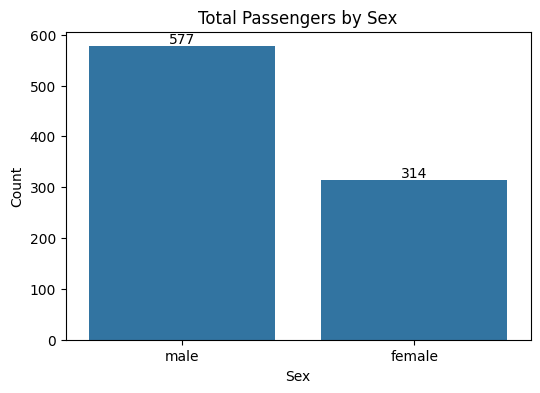

In [ ]:
# Percentail Calculation by Gender for Total Passenger
female_percentage = train["Sex"].value_counts(normalize=True)["female"] * 100
male_percentage = train["Sex"].value_counts(normalize=True)["male"] * 100

print(f"Percentage of females on board: {female_percentage:.1f}%")
print(f"Percentage of males on board: {male_percentage:.1f}%")

# Count the number of total passengers by sex
passenger_counts = train["Sex"].value_counts().reset_index()
passenger_counts.columns = ["Sex", "Count"]

# Create the bar plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x="Sex", y="Count", data=passenger_counts)

# Annotate bars with values
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d')  # Shows integer values

plt.title("Total Passengers by Sex")
plt.show()

Percentage of females who survived: 74.2%
Percentage of males who survived: 18.9%


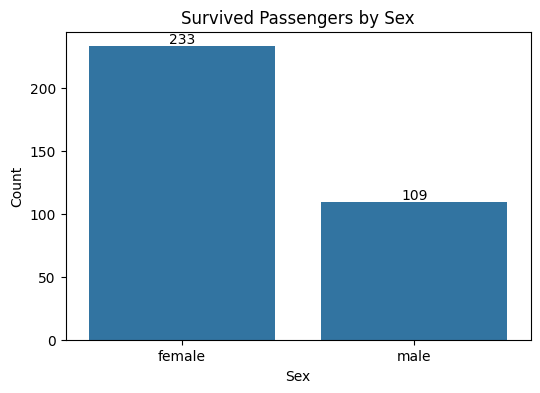

In [ ]:
# Percentile of Survival Rate by Gender
female_survival_rate = train["Survived"][train["Sex"] == 'female'].value_counts(normalize=True).get(1, 0) * 100
male_survival_rate = train["Survived"][train["Sex"] == 'male'].value_counts(normalize=True).get(1, 0) * 100

print(f"Percentage of females who survived: {female_survival_rate:.1f}%")
print(f"Percentage of males who survived: {male_survival_rate:.1f}%")

# Count the number of survived passengers by sex
passenger_counts = train.groupby("Sex")["Survived"].sum().reset_index()
passenger_counts.columns = ["Sex", "Count"]

# Create the bar plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x="Sex", y="Count", data=passenger_counts)

# Annotate bars with values
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d')  # Shows integer values

plt.title("Survived Passengers by Sex")
plt.show()


Step 3 :  Visualization of Age

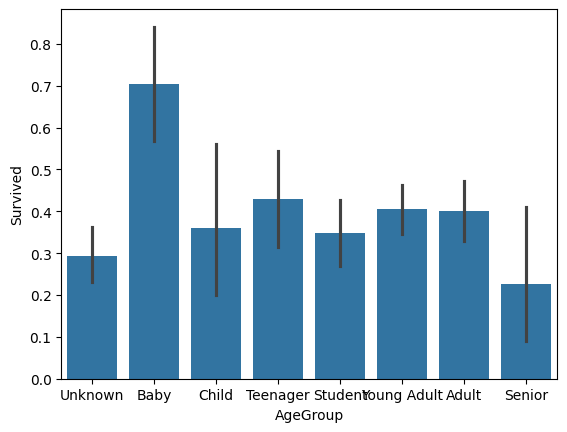

In [ ]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Step 4 : Visualization of Sibling / Spouse

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


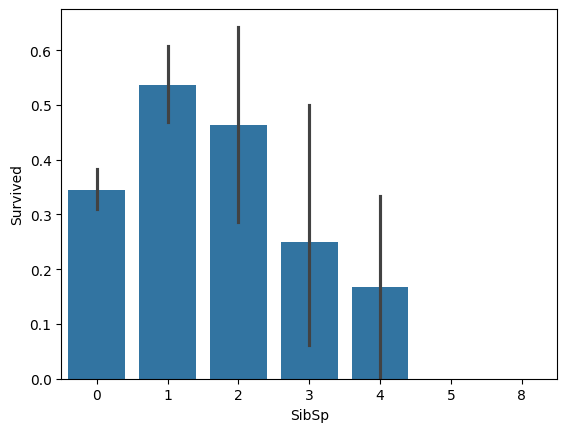

In [ ]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

Step 5 : Visualization of Parent / Children

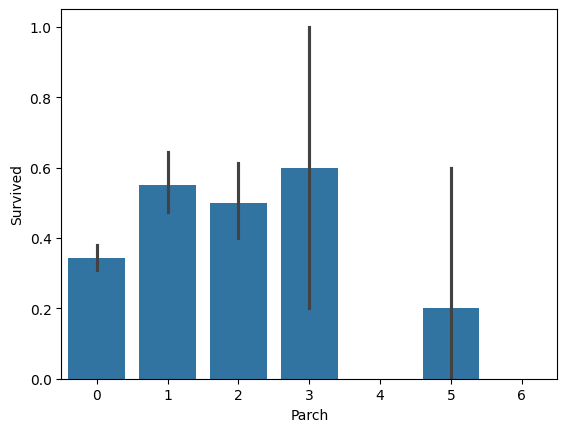

In [ ]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

Step 6 : Visualization of Passenger Class

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


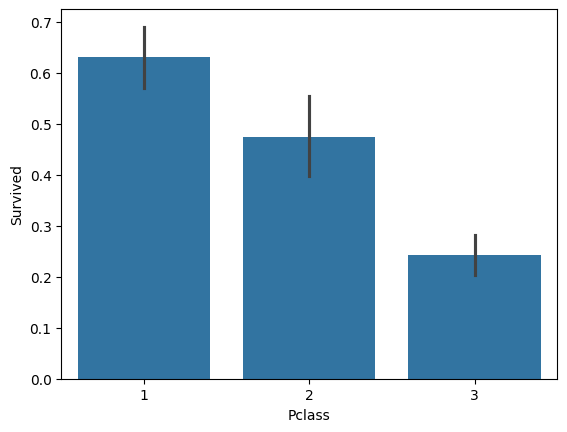

In [ ]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

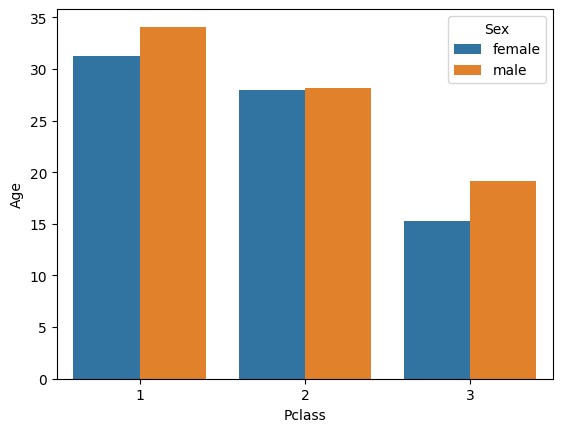

In [ ]:
#Pclass가 x축 값이며, Age 평균값이 y축 값. hue parameter로 Sex 를 설정하여 barplot 그림.
sns.barplot(x='Pclass', y='Age', hue='Sex', data=train, ci=None)
plt.show()

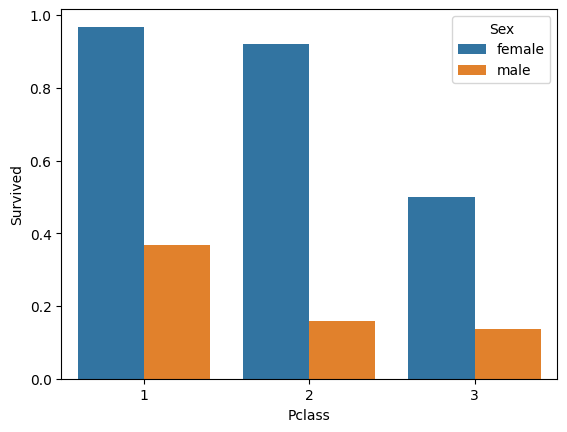

In [ ]:
#Pclass가 x축 값이며, Survived 평균이 y축 값.  hue parameter를 gender로 설정하여 barplot 그림
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train, ci=None)
plt.show()

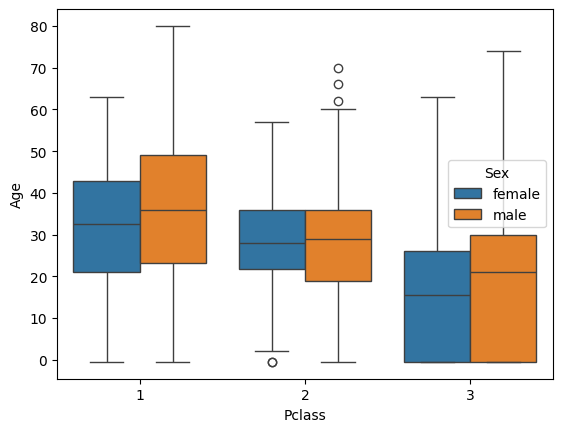

In [ ]:
#Pclass 별 & Sex별, Age 분포를 보여주는 boxplot 그림.   Age의  min, max, abnormal(이상치) 보여줌
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=train)
plt.show()

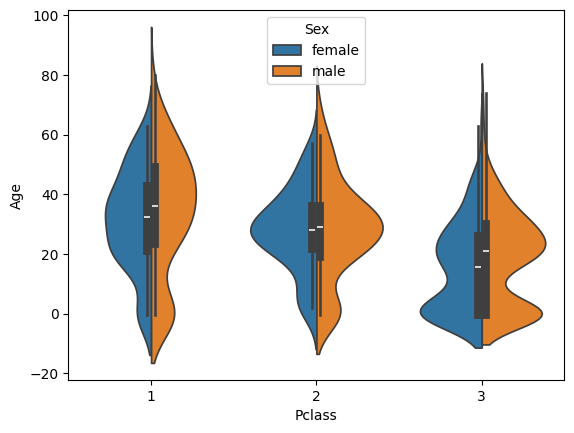

In [ ]:
#Pclass와 Sex가 x축일 때, Age가 y축인, 바이올린 플롯그림
sns.violinplot(x='Pclass', y='Age', hue='Sex', data=train, split=True)
plt.show()

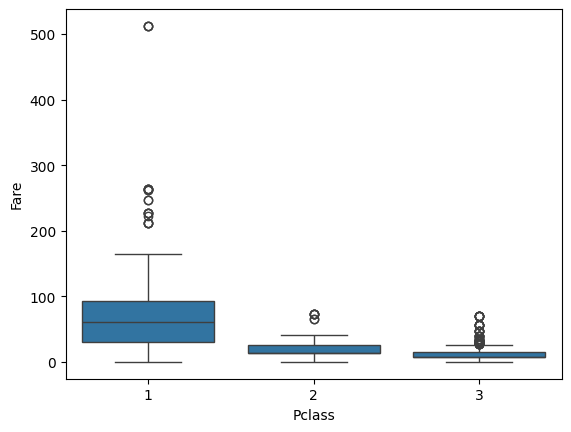

In [ ]:
#Pclass 별 Fare 분포를 보여주는 boxplot 그림.
sns.boxplot(x='Pclass', y='Fare', data=train)
plt.show()

Step 7 ;  Seaborn Subplots

index: 0
index: 1
index: 2
index: 3
index: 4
index: 5


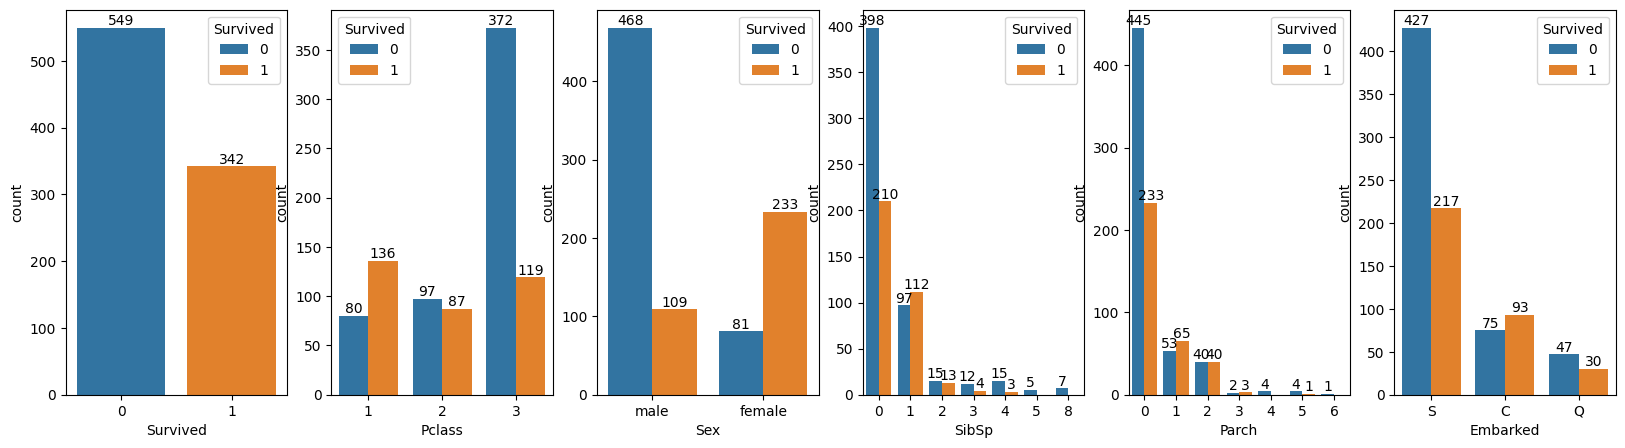

In [ ]:
#subplots를 이용해서, 여러개의 graph를 보여줌.

cat_columns=['Survived','Pclass','Sex','SibSp','Parch','Embarked']

#nrows는 1이고, ncols는 칼럽의 개수만큼인 subplots를 설정
fig, axes = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(20, 5))

#enumerate
for index, column in enumerate(cat_columns):
  print('index:', index)
  #seaboarn의 Axes label function들은 ax 인자로 subplots의 어느 axes에 위치할 지 설정.
  sns.countplot(x=column, hue='Survived', data=train, ax=axes[index])

# Annotate bars correctly by iterating over each subplot
for axis in axes:
    for bar in axis.containers:
        axis.bar_label(bar, fmt='%d')  # Displays integer values

plt.show()

Step 8 :  이중 추려서 보면,  Pclass, Gender, Embarked 별로, 탑승자 수와 생존자 수를 비교

index: 0
index: 1
index: 2


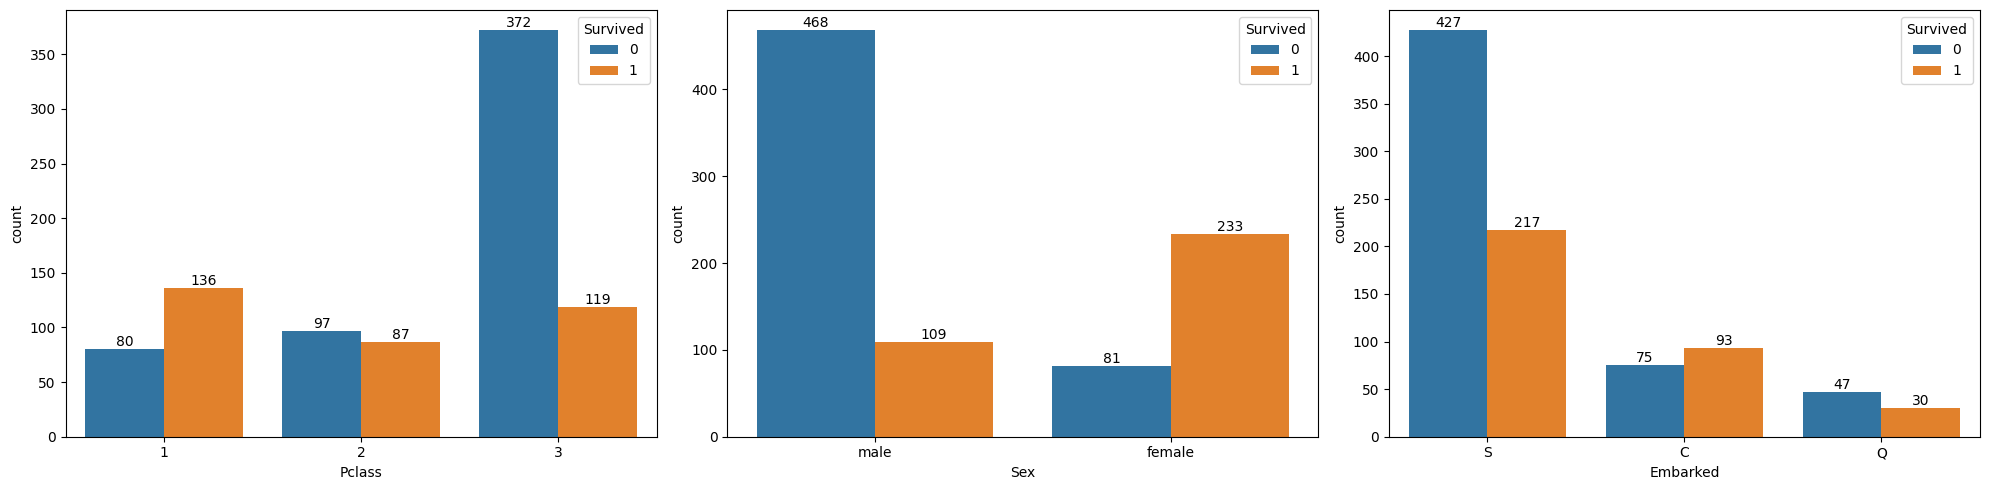

In [ ]:
cat_columns = ['Pclass', 'Sex', 'Embarked']

fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(20, 5))

for index, column in enumerate(cat_columns):
    print('index:', index)
    ax = axs[index]
    sns_bar = sns.countplot(x=column, hue='Survived', data=train, ax=ax)

    # 각 bar에 수치 표시
    for container in sns_bar.containers:
        sns_bar.bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()

Step 9 : Pclass, Gender, Embarked 별로 생존율 비교

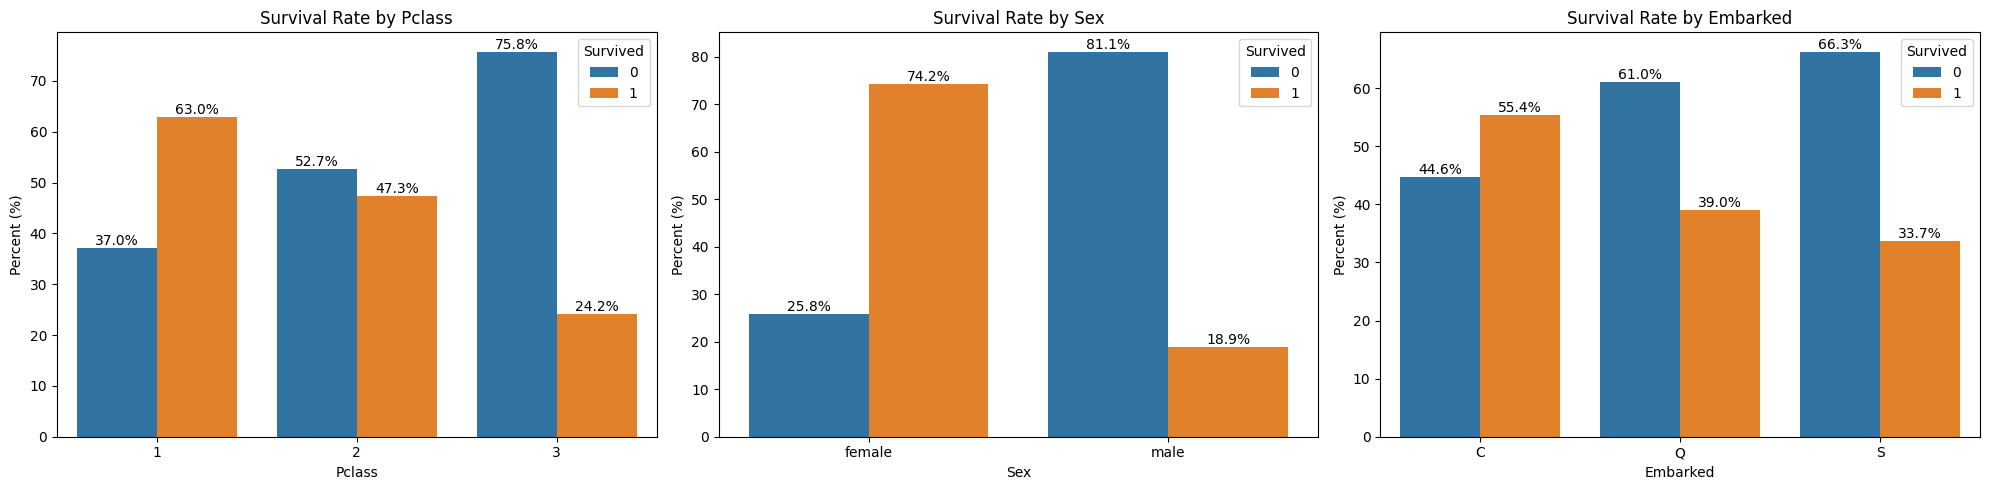

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cat_columns = ['Pclass', 'Sex', 'Embarked']

fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(20, 5))

for index, column in enumerate(cat_columns):
    ax = axs[index]

    # 교차표 생성 후 비율 계산
    cross_tab = pd.crosstab(train[column], train['Survived'], normalize='index') * 100
    cross_tab = cross_tab.reset_index().melt(id_vars=column, value_vars=[0, 1],
                                             var_name='Survived', value_name='Percent')

    # 막대그래프
    sns_bar = sns.barplot(x=column, y='Percent', hue='Survived', data=cross_tab, ax=ax)
    sns_bar.set_title(f'Survival Rate by {column}')
    sns_bar.set_ylabel('Percent (%)')

    # 막대에 비율 라벨 붙이기
    for container in sns_bar.containers:
        sns_bar.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()


Step 10 :  전체 탑승자 비율과 생존자 비율을 age, gender, Pclass, fare별로 보여주기

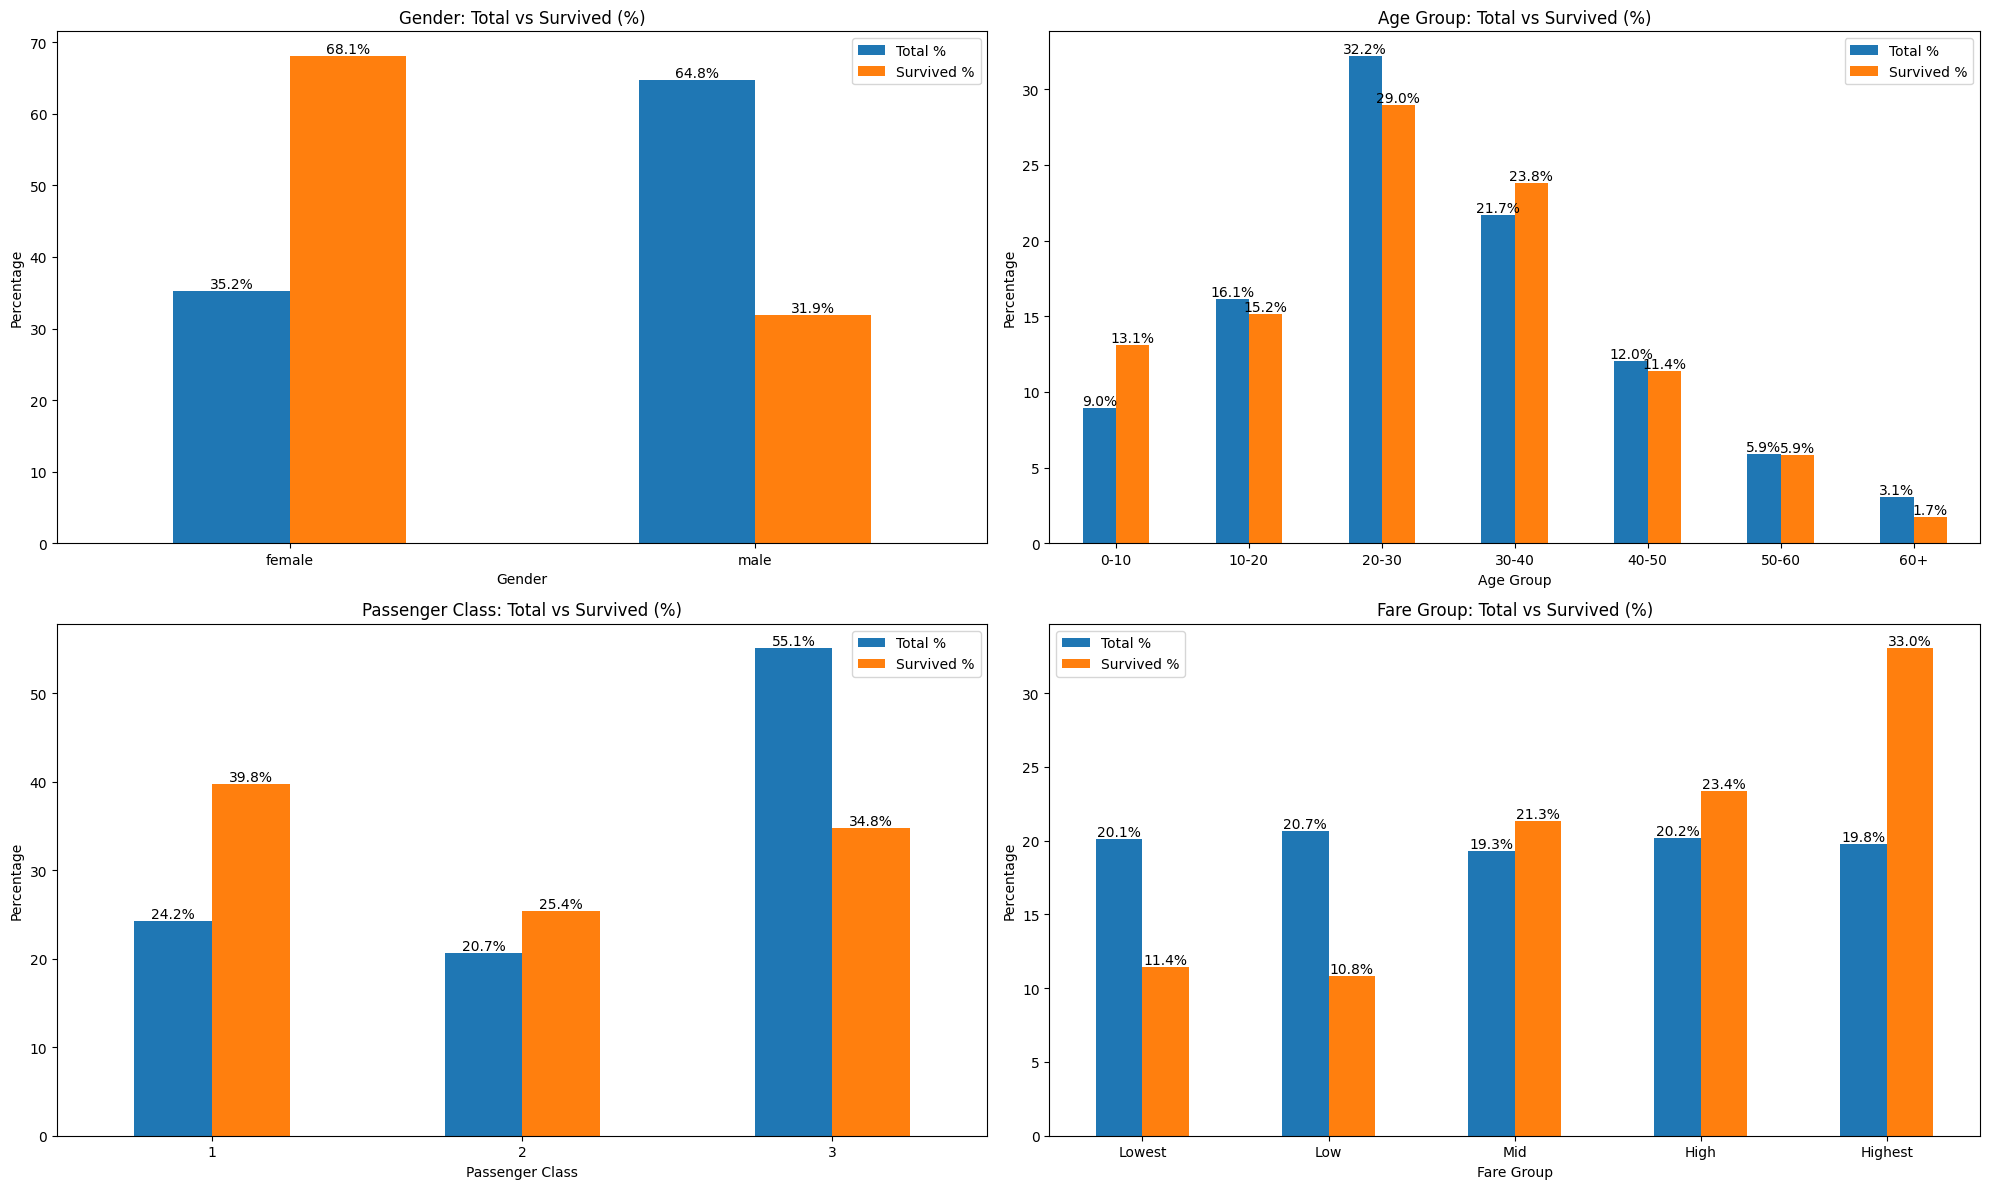

In [ ]:
# 연속형 변수 binning
train['AgeBin'] = pd.cut(train['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+'])
train['FareBin'] = pd.qcut(train['Fare'], q=5, labels=['Lowest', 'Low', 'Mid', 'High', 'Highest'])

# 분석할 변수들: 원본 컬럼명 → 그래프 제목용 라벨
features = {
    'Sex': 'Gender',
    'AgeBin': 'Age Group',
    'Pclass': 'Passenger Class',
    'FareBin': 'Fare Group'
}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axs = axs.flatten()

for idx, (col, label) in enumerate(features.items()):
    ax = axs[idx]

    # 전체 승객 비율과 생존자 비율 계산
    total_pct = train[col].value_counts(normalize=True).sort_index() * 100
    survived_pct = train[train['Survived'] == 1][col].value_counts(normalize=True).sort_index() * 100

    df_plot = pd.DataFrame({
        'Total %': total_pct,
        'Survived %': survived_pct
    }).fillna(0)

    df_plot = df_plot.sort_index()

    # 막대 그래프 그리기
    bars = df_plot.plot(kind='bar', ax=ax, rot=0)
    ax.set_title(f'{label}: Total vs Survived (%)')
    ax.set_ylabel('Percentage')
    ax.set_xlabel(label)
    ax.legend(loc='best')

    # 막대에 퍼센트 수치 붙이기
    for container in bars.containers:
        bars.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()


Step  11 :  탑승자와 생존자의 비율을  age x gender로 보여주기

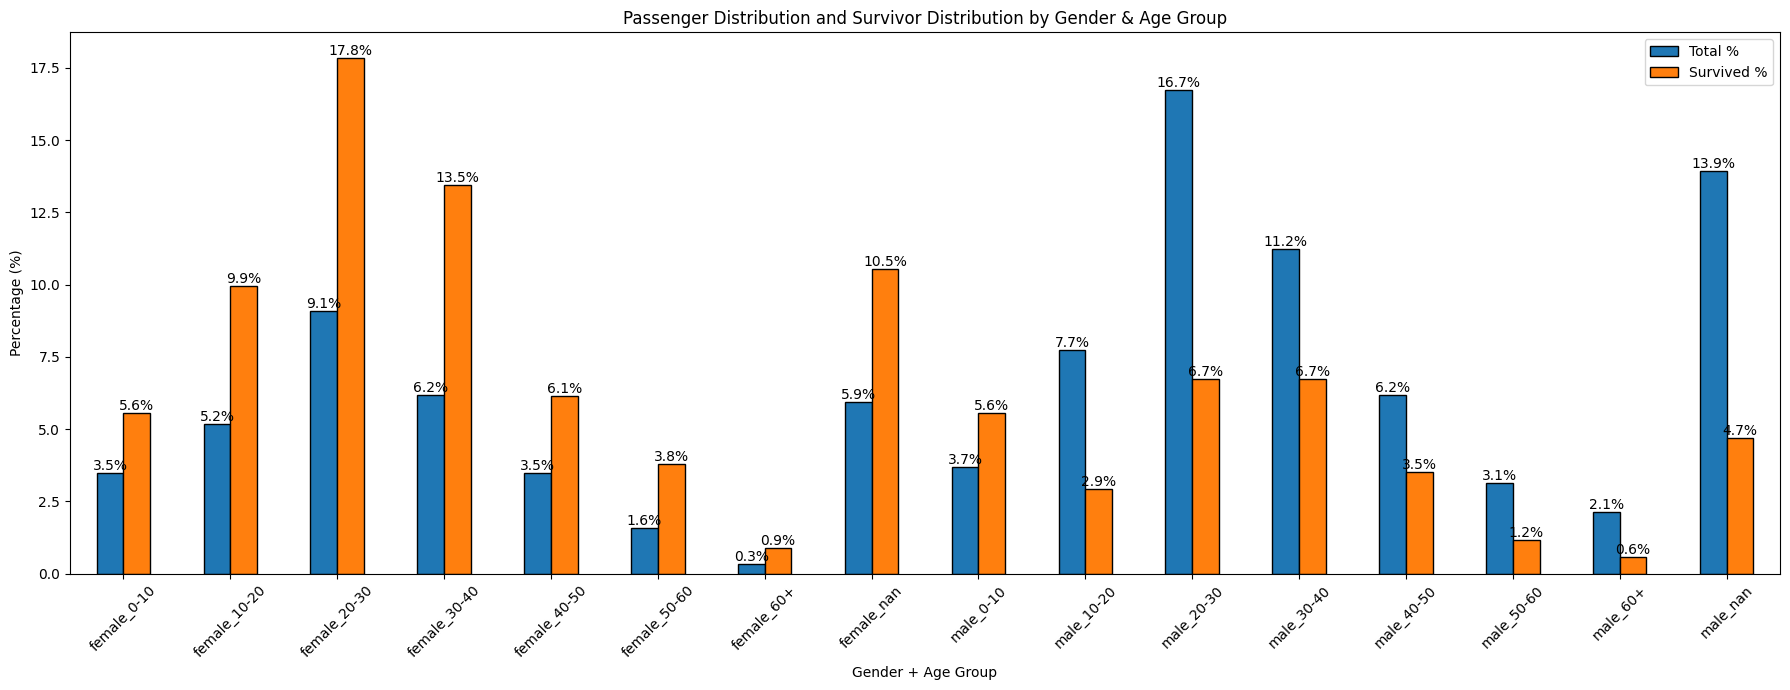

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Age binning
train['AgeBin'] = pd.cut(train['Age'], bins=[0,10,20,30,40,50,60,80], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60+'])

# Group by Gender + AgeBin
train['Sex_AgeGroup'] = train['Sex'] + '_' + train['AgeBin'].astype(str)

# 전체 탑승자 비율
total_pct = train['Sex_AgeGroup'].value_counts(normalize=True).sort_index() * 100

# 생존자 비율
survived_pct = train[train['Survived'] == 1]['Sex_AgeGroup'].value_counts(normalize=True).sort_index() * 100

# 결합된 DataFrame 생성
df_plot = pd.DataFrame({
    'Total %': total_pct,
    'Survived %': survived_pct
}).fillna(0)

# 정렬 순서 유지
df_plot = df_plot.sort_index()

# 시각화
ax = df_plot.plot(kind='bar', figsize=(18, 7), rot=45, edgecolor='black')
ax.set_title('Passenger Distribution and Survivor Distribution by Gender & Age Group')
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Gender + Age Group')
ax.legend(loc='upper right')

# 퍼센트 라벨 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()


Step 11 :  Survival Rate ( 탑승자 비율 vs. 생존자 비율)

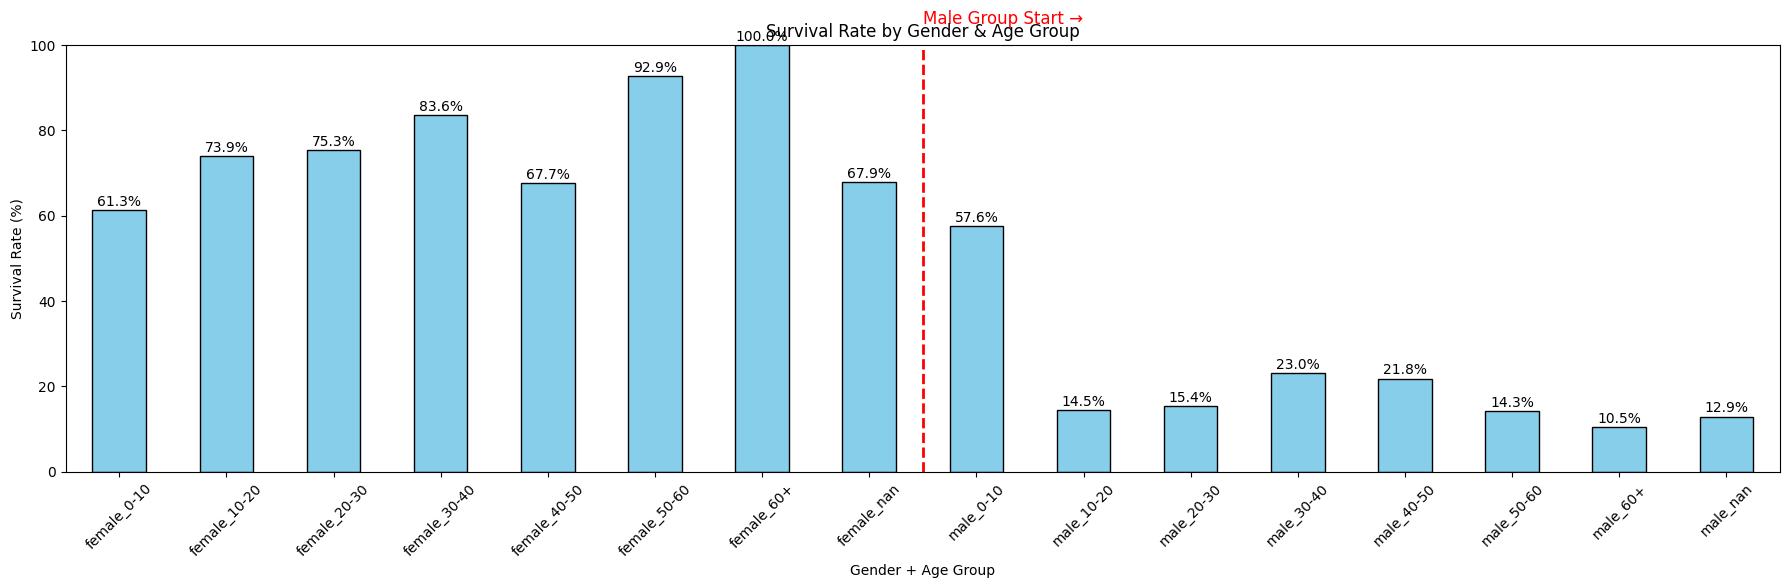

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 나이 그룹화
train['AgeBin'] = pd.cut(train['Age'], bins=[0,10,20,30,40,50,60,80], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60+'])

# 성별 + 나이대 조합
train['Sex_AgeGroup'] = train['Sex'] + '_' + train['AgeBin'].astype(str)

# 생존률 계산
survival_rate = train.groupby('Sex_AgeGroup')['Survived'].mean().sort_index() * 100

# x축 순서 확보
sex_age_order = sorted(survival_rate.index)

# 성별 구분 위치 계산
female_count = sum(['female' in x for x in sex_age_order])

# 시각화
plt.figure(figsize=(18, 6))
ax = survival_rate.loc[sex_age_order].plot(kind='bar', color='skyblue', edgecolor='black', rot=45)
ax.set_title('Survival Rate by Gender & Age Group')
ax.set_ylabel('Survival Rate (%)')
ax.set_xlabel('Gender + Age Group')
ax.set_ylim(0, 100)

# 퍼센트 표시
for i, v in enumerate(survival_rate.loc[sex_age_order]):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=10)

# 성별 구분선 추가
plt.axvline(x=female_count - 0.5, color='red', linestyle='--', linewidth=2)
plt.text(female_count - 0.5, 105, 'Male Group Start →', color='red', fontsize=12, ha='left')

plt.tight_layout()
plt.show()


Step 12 : Scatter Plot

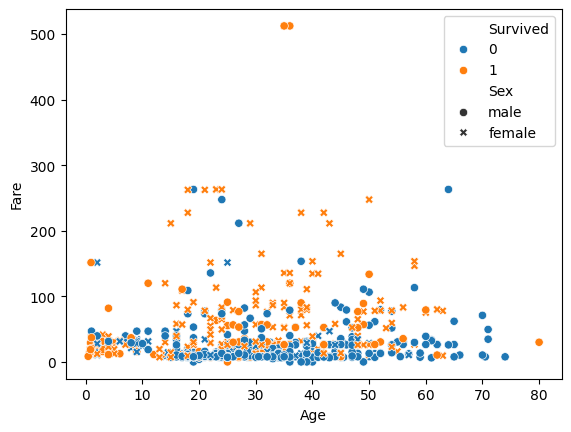

In [ ]:
# x축값으로 Age를, y축값으로 Fare를 측정

sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Sex', data=train)
plt.show()

Step 13 : Heatmap   성별이

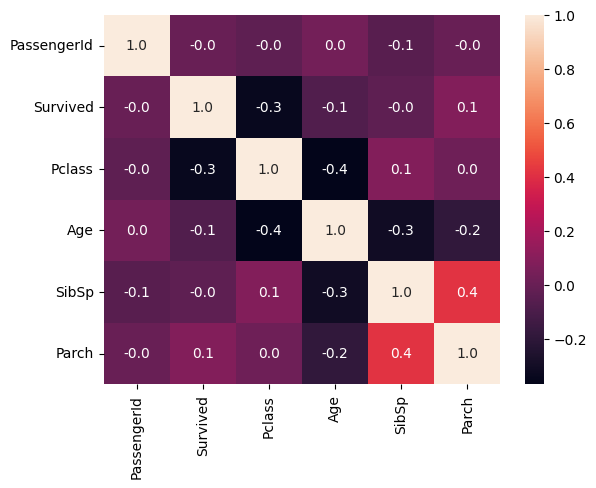

In [ ]:
train_df = train[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch']]
corr = train_df.corr()
sns.heatmap(corr, annot=True, fmt='.1f', cbar=True)
plt.show()